In [1]:
from buildstock_query import BuildStockQuery
import pandas as pd
import os
os.environ['AWS_PROFILE'] = "nrel-aws-resbldg"
os.environ['AWS_DEFAULT_REGION'] = "us-west-2"
## annual table - from SQL
## timeseries tables - from timeseries (8760)

c:\Users\pshrest2\Anaconda3\envs\buildstock_query\lib\site-packages\pydantic\_internal\_config.py:269: UserWarning: Valid config keys have changed in V2:
* 'smart_union' has been removed
  warnings.warn(message, UserWarning)
c:\Users\pshrest2\Anaconda3\envs\buildstock_query\lib\site-packages\pydantic\_internal\_config.py:269: UserWarning: Valid config keys have changed in V2:
* 'smart_union' has been removed
  warnings.warn(message, UserWarning)
c:\Users\pshrest2\Anaconda3\envs\buildstock_query\lib\site-packages\pydantic\_internal\_config.py:269: UserWarning: Valid config keys have changed in V2:
* 'smart_union' has been removed
  warnings.warn(message, UserWarning)


In [2]:
my_run = BuildStockQuery(db_name='gashpwh',
                        table_name='icf',
                        workgroup='gashpwh',
                        buildstock_type='resstock')

INFO:buildstock_query.query_core:Loading icf ...
INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials
INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials
INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials
INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials
INFO:buildstock_query.query_core:3 queries cache read from icf_query_cache.pkl.
INFO:buildstock_query.query_core:3 queries cache is updated.
INFO:buildstock_query.main:Getting Success counts...
INFO:buildstock_query.report_query:Checking integrity with ts_tables ...
INFO:buildstock_query.query_core:3 queries cache saved to icf_query_cache.pkl


        Fail  Invalid Success    Sum
upgrade                             
0         42        0   15955  15997
Annual and timeseries tables are verified to have the same number of buildings.
All buildings are verified to have the same number of (8760) timeseries rows.


In [3]:
res_df = my_run.get_results_csv()
res_df.columns

INFO:buildstock_query.main:Making results_csv query ...
c:\Users\pshrest2\Anaconda3\envs\buildstock_query\lib\site-packages\pyathena\pandas\result_set.py:273: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(
c:\Users\pshrest2\Anaconda3\envs\buildstock_query\lib\site-packages\pyathena\pandas\result_set.py:273: DtypeWarning: Columns (10,183,184,185,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,481,482,505,521) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(


Index(['job_id', 'started_at', 'completed_at', 'completed_status',
       'apply_upgrade.applicable', 'apply_upgrade.upgrade_name',
       'apply_upgrade.reference_scenario', 'build_existing_model.ahs_region',
       'build_existing_model.aiannh_area', 'build_existing_model.applicable',
       ...
       'report_utility_bills.bills_propane_fixed_usd',
       'report_utility_bills.bills_propane_total_usd',
       'report_utility_bills.bills_total_usd',
       'report_utility_bills.bills_wood_cord_energy_usd',
       'report_utility_bills.bills_wood_cord_fixed_usd',
       'report_utility_bills.bills_wood_cord_total_usd',
       'report_utility_bills.bills_wood_pellets_energy_usd',
       'report_utility_bills.bills_wood_pellets_fixed_usd',
       'report_utility_bills.bills_wood_pellets_total_usd',
       'report_utility_bills.output_format'],
      dtype='object', length=545)

Dataframe for emissions:

In [26]:
# Creating a list of columns to keep in the res_df dataframe:
regex_patterns = ['report_simulation_output.emissions',
'build_existing_model.cec_climate_zone',
'build_existing_model.geometry_stories',
'build_existing_model.heating_fuel'
'build_existing_model.hot_water_distribution',
'build_existing_model.hot_water_fixtures',
'build_existing_model.hvac_heating_type_and_fuel',
'build_existing_model.income_recs_2020',
'build_existing_model.occupants',
'build_existing_model.sample_weight',
'build_existing_model.vacancy_status',
'build_existing_model.vintage',
'build_existing_model.water_heater_efficiency',
'build_existing_model.water_heater_fuel',
'build_existing_model.water_heater_in_unit',
'report_simulation_output.fuel_use',
'report_simulation_output.load_hot_water_tank_losses_m_btu'
]

In [27]:
# Basic filtering example:
df = res_df.filter(regex='report_simulation_output.emissions')
# df_total = df.filter(regex='total')
print(df.columns)

Index(['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_coal_clothes_dryer_lb',
       'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_coal_fireplace_lb',
       'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_coal_generator_lb',
       'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_coal_grill_lb',
       'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_coal_heating_heat_pump_backup_lb',
       'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_coal_heating_lb',
       'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_coal_hot_water_lb',
       'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_coal_lighting_lb',
       'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_coal_mech_vent_preheating_lb',
       'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_coal_range_oven_lb',
       ...
       'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_wood_pellets_fire

In [38]:
filtered_dfs = [res_df.filter(regex=pattern) for pattern in regex_patterns]
df = pd.concat(filtered_dfs, axis=1)
# df.drop(df[df['build_existing_model.geometry_stories'] > 5].index, inplace=True) # TBD
print(df.columns)

Index(['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_coal_clothes_dryer_lb',
       'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_coal_fireplace_lb',
       'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_coal_generator_lb',
       'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_coal_grill_lb',
       'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_coal_heating_heat_pump_backup_lb',
       'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_coal_heating_lb',
       'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_coal_hot_water_lb',
       'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_coal_lighting_lb',
       'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_coal_mech_vent_preheating_lb',
       'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_coal_range_oven_lb',
       ...
       'build_existing_model.water_heater_in_unit',
       'report_simulation_output.

In [39]:
# Outputting the full emissions dataset for easy viewing:
df.to_csv('emissions/df.csv', index=False)
res_df.to_csv('emissions/res_df.csv', index=False)

Sanity check plot

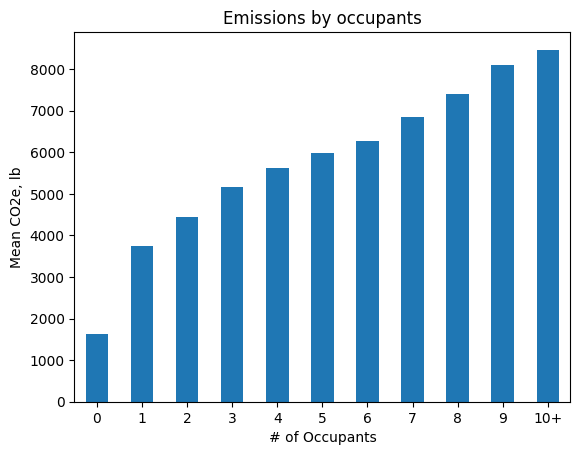

In [41]:
import matplotlib.pyplot as plt

grouped = df.groupby('build_existing_model.occupants')['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_total_lb'].mean()

# Sort the data based on the mean values in ascending order
grouped_sorted = grouped.sort_values()

# Generate bar graph for each group
ax = grouped_sorted.plot(kind='bar')
plt.ylabel('Mean CO2e, lb')
plt.xlabel('# of Occupants')
plt.title('Emissions by occupants')
ax.set_xticklabels(grouped_sorted.index, rotation=0)
plt.show()

Actual plots

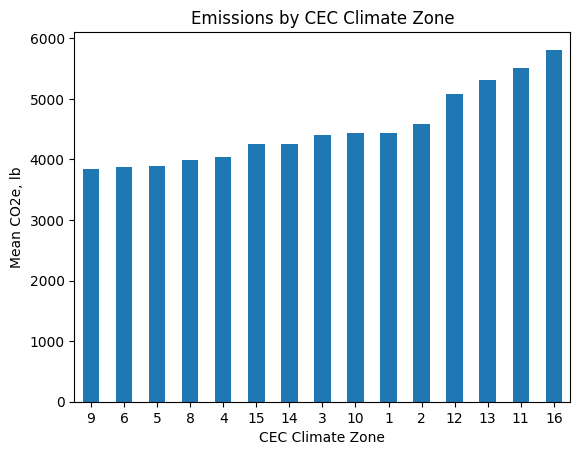

In [36]:
import matplotlib.pyplot as plt

# df.plot(x='build_existing_model.cec_climate_zone', y= 'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_total_lb', kind='bar')

grouped = df.groupby('build_existing_model.cec_climate_zone')['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_total_lb'].mean()

# Sort the data based on the mean values in ascending order
grouped_sorted = grouped.sort_values()

# Generate bar graph for each group
ax = grouped_sorted.plot(kind='bar')
plt.ylabel('Mean CO2e, lb')
plt.xlabel('CEC Climate Zone')
plt.title('Emissions by CEC Climate Zone')
ax.set_xticklabels(grouped_sorted.index, rotation=0)
plt.show()
